# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

# Given function

In [4]:
def given_function(x):
    return np.exp(-4 * np.sin(x))

# Function plot

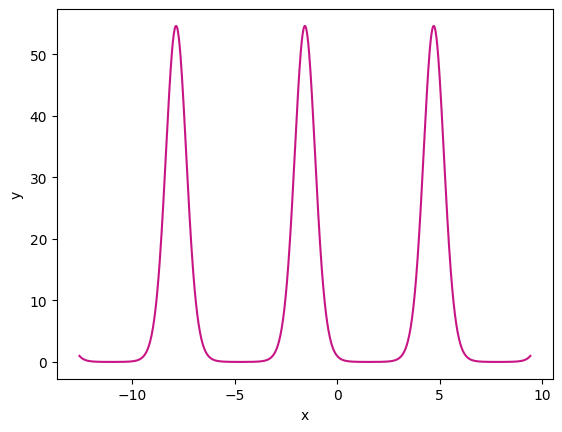

In [5]:
x = np.linspace(-4*np.pi, 3*np.pi, 1000)
y = np.exp(-4 * np.sin(x))

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Solution

In [13]:
def scale_to_2pi(X, start, end):
    range_length = end - start
    for i in range(len(X)):
        X[i] /= range_length
        X[i] *= 2 * np.pi
        X[i] += -np.pi - (2 *np.pi * start / range_length)  
    return X

def count_A_B(A, B, X, Y, n):
    for i in range(n):
        ai = sum(Y[j] * np.cos(i * X[j]) for j in range(n))
        bi = sum(Y[j] * np.sin(i * X[j]) for j in range(n))
        A[i] = 2 * ai / n
        B[i] = 2 * bi / n
    return A, B

def scale_from_2pi(X, start, end):
    range_length = end - start
    for i in range(len(X)):
        X[i] -= -np.pi - (2 * np.pi * start / range_length)
        X[i] /= 2 * np.pi
        X[i] *= range_length
    return X

def scale_point_to_2pi(x, start, end):
    range_length = end - start
    x /= range_length
    x *= 2 * np.pi
    x += -np.pi - (2 * np.pi * start / range_length)
    return x
    
def approximation_func(X, Y, m, A, B, start, end):
    points = []
    for x in X:
        cp_x = deepcopy(x)
        cp_x = scale_point_to_2pi(cp_x, start, end)
        approximated_x = 1 / 2 * A[0] + sum(A[j] * np.cos(j * cp_x) + B[j] * np.sin(j * cp_x)
                                                 for j in range(1, m + 1))
        points.append(approximated_x)
    return points

def trig_approximation(start, end, n, m, bad_case=False):
    if not bad_case:
        if m > np.floor((n-1)/2):
            print("m cannot be greater than floor of (n-1)/2")
            return 0
    X = np.linspace(start, end, n)
    Y = given_function(X)
    A = np.zeros(n)
    B = np.zeros(n)
    X = scale_to_2pi(X, start, end)
    A, B = count_A_B(A, B, X, Y, n)
    X = scale_from_2pi(X, start, end) 
    trig_result = approximation_func(X, Y, m, A, B, start, end)
    draw_plot(X, Y, start, end, n, m, approximation_func, A, B, Y)
    

# Plot 

In [7]:
def draw_plot(x, y, start, end, n, m, function, A, B, Y):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color="black")
    X = np.arange(start, end+0.01, 0.01)
    plt.plot(X, given_function(X), color="mediumvioletred")
    plt.plot(X, function(X, Y, m, A, B, start, end), color="darkmagenta", linewidth=3)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    

# Errors

In [6]:
def trig_app(X, Y, n, m, start, end):
    Y = given_function(X)
    A = np.zeros(n)
    B = np.zeros(n)
    X = scale_to_2pi(X, start, end)
    A, B = count_A_B(A, B, X, Y, n)
    X = scale_from_2pi(X, start, end) 
    trig_result = approximation_func(X, Y, m, A, B, start, end)
    return trig_result

def max_error(Y1, Y2):
    return np.max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

def calculate_error(start, stop, nodes, m):
    result = [None for _ in range(2 * len(m) * len(nodes))]

    total_X = np.linspace(start, stop, 1000)
    func_val = given_function(total_X)
    idx = 0

    for n in nodes:
        X = np.linspace(start, stop, n)
        Y = given_function(X)
        for i in m:
            if i > np.floor((n-1)/2):
                result[idx] = np.nan
                result[idx+1] = np.nan
            else:
                trig_approximation_result = trig_app(X, Y, n, i, start, end)
                result[idx] = max_error(trig_approximation_result, func_val)
                result[idx + 1] = sum_square_error(trig_approximation_result, func_val)
            idx += 2
            
        df = pd.DataFrame(data={"n": [val for val in nodes for _ in range(len(m))],
                 "m": m * len(nodes),
                 "max error": result[::2],
                 "sum square error": result[1::2]})
    
    return df

In [7]:
start = -4 * np.pi
end = 3 * np.pi

max_pol_degree = [2, 3, 5, 10, 14, 20, 24]
points_number= [5, 7, 10, 20, 30, 50, 80, 100]

df = calculate_error(start, end, points_number, max_pol_degree)
df

,n,m,max error,sum square error
0,5,2,47.392041,2434.803526
1,5,3,NaN,NaN
2,5,5,NaN,NaN
3,5,10,NaN,NaN
4,5,14,NaN,NaN
5,5,20,NaN,NaN
6,5,24,NaN,NaN
7,7,2,36.414177,1738.545930
8,7,3,55.646652,3922.874627
9,7,5,NaN,NaN


# Main function


Aproksymacja dla różnej liczba funkcji bazowych




Liczba punktów: 80, Maksymalny stopień 2



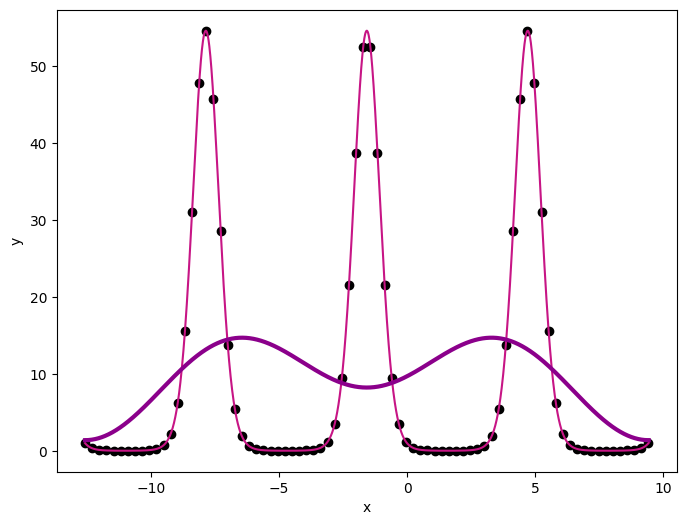




Liczba punktów: 80, Maksymalny stopień 3



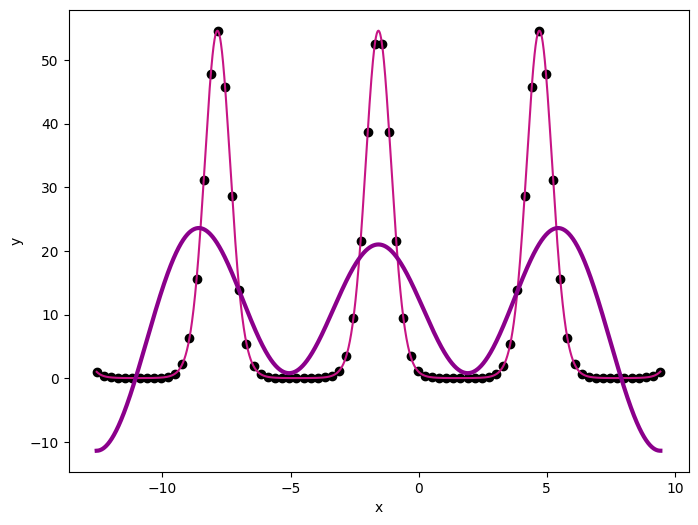




Liczba punktów: 80, Maksymalny stopień 5



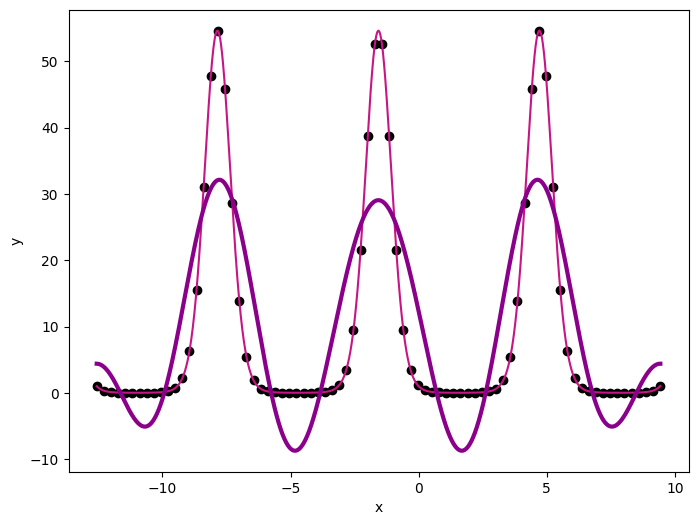




Liczba punktów: 80, Maksymalny stopień 10



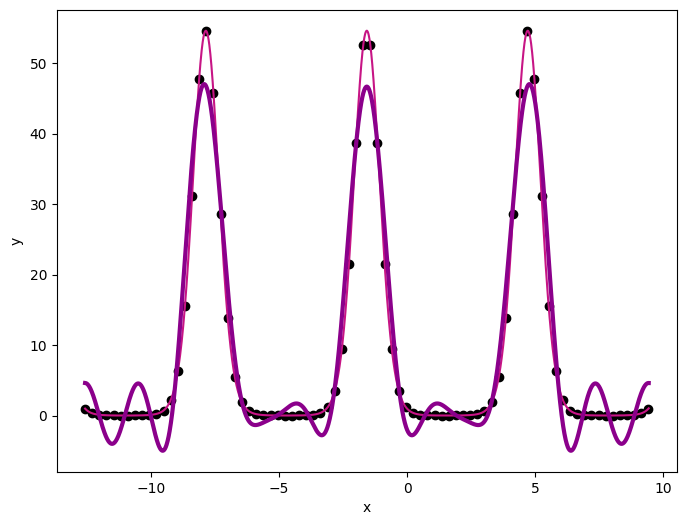




Liczba punktów: 80, Maksymalny stopień 14



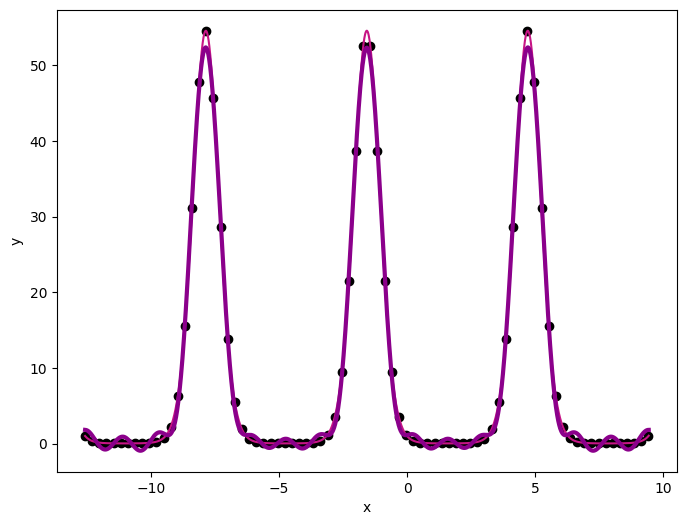




Liczba punktów: 80, Maksymalny stopień 20



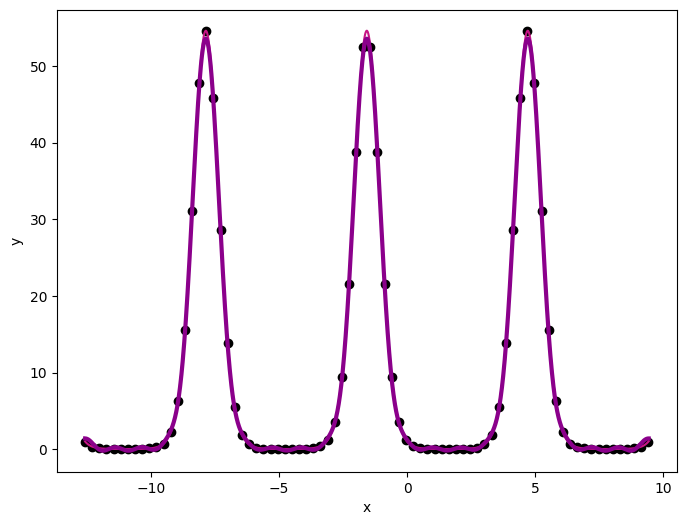




Liczba punktów: 80, Maksymalny stopień 24



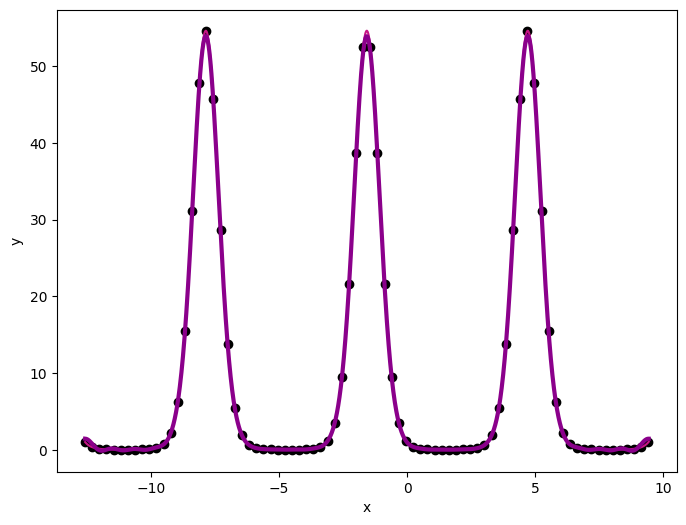





Aproksymacja dla różnej liczby punktów




Liczba punktów: 5, Maksymalny stopień 3

m cannot be greater than floor of (n-1)/2



Liczba punktów: 7, Maksymalny stopień 3



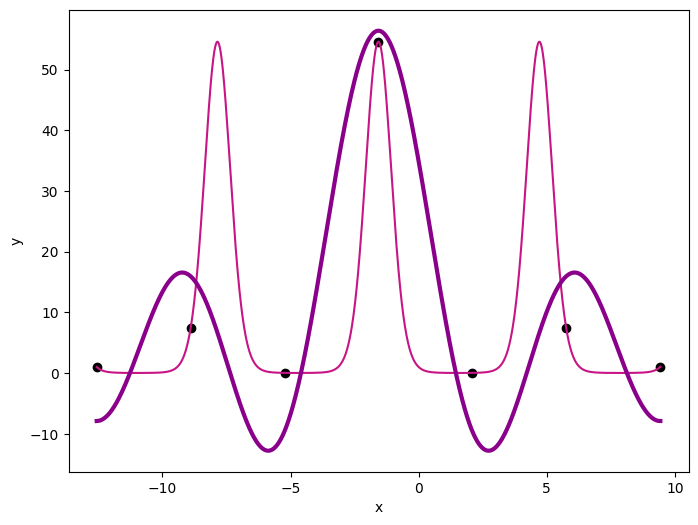




Liczba punktów: 10, Maksymalny stopień 3



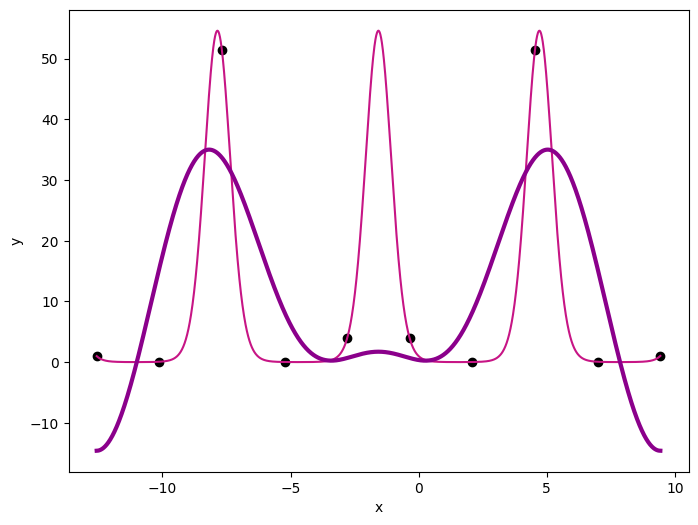




Liczba punktów: 20, Maksymalny stopień 3



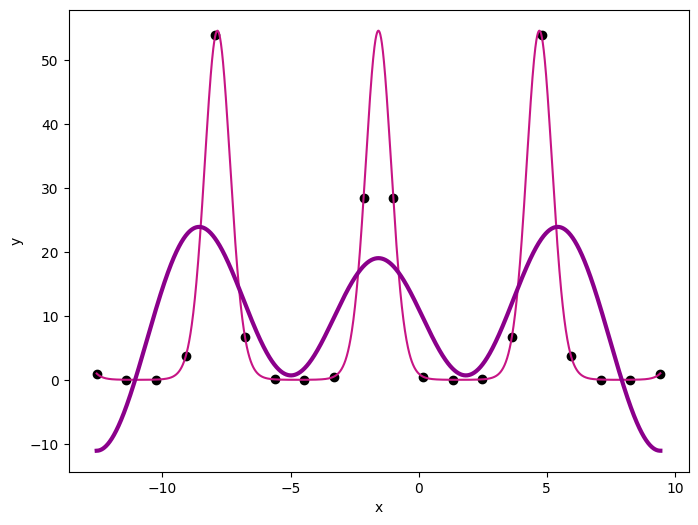




Liczba punktów: 30, Maksymalny stopień 3



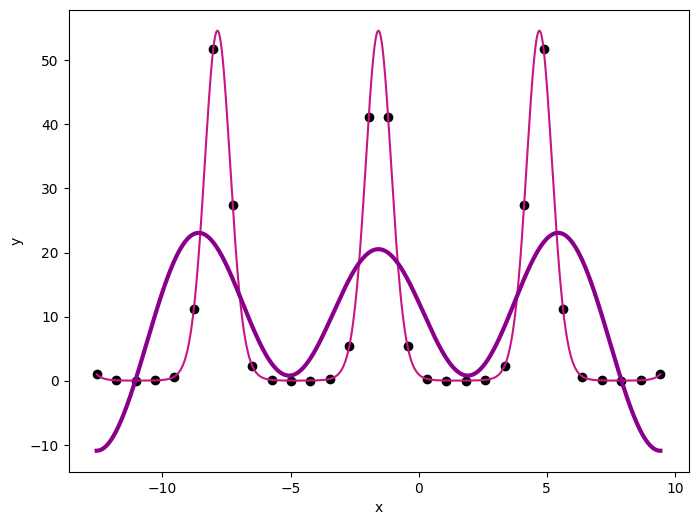




Liczba punktów: 50, Maksymalny stopień 3



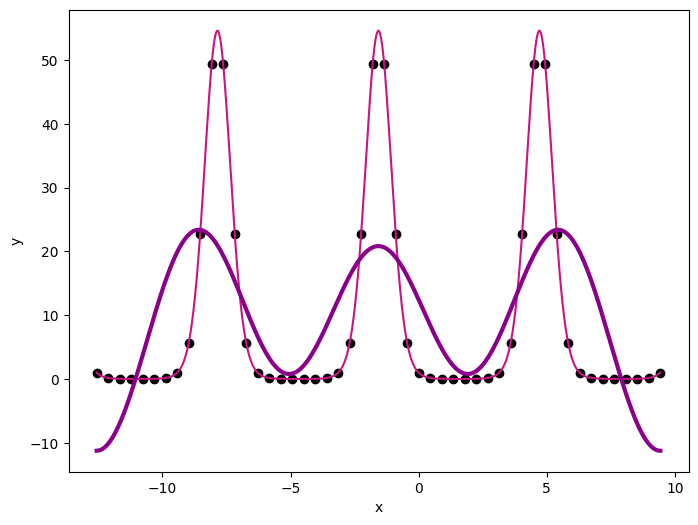




Liczba punktów: 80, Maksymalny stopień 3



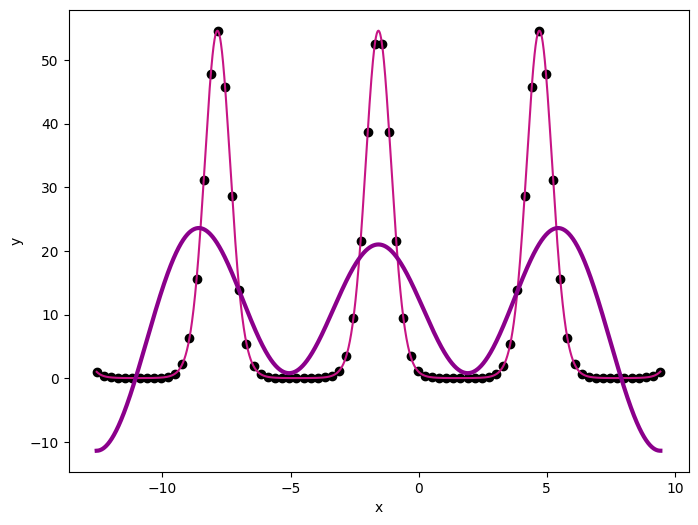




Liczba punktów: 100, Maksymalny stopień 3



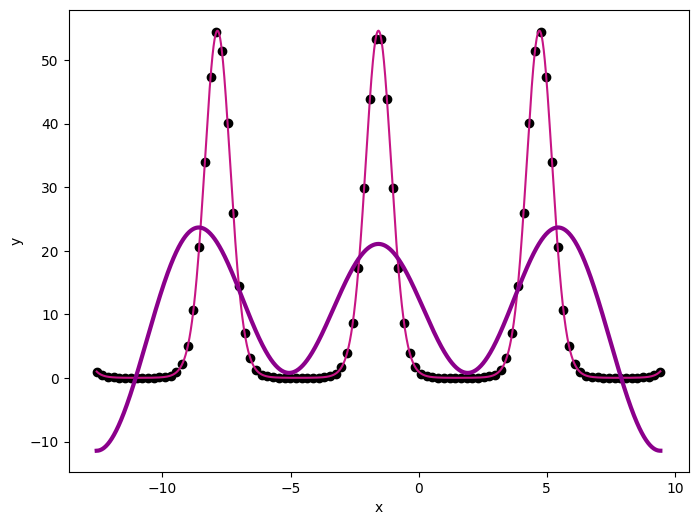

In [19]:
start = -4 * np.pi
end = 3 * np.pi

max_pol_degree = [2, 3, 5, 10, 14, 20, 24]
points_number= [5, 7, 10, 20, 30, 50, 80, 100]

print(f"===============================================\n")
print(f"Aproksymacja dla różnej liczba funkcji bazowych\n")
print(f"===============================================")

for m in max_pol_degree:
    n = 80
    print(f"\n\n\nLiczba punktów: {n}, Maksymalny stopień {m}\n")
    trig_approximation(start, end, n, m)
    
print(f"\n\n\n===============================================\n")
print(f"Aproksymacja dla różnej liczby punktów\n")
print(f"===============================================")
for n in points_number:
    m = 3
    print(f"\n\n\nLiczba punktów: {n}, Maksymalny stopień {m}\n")
    trig_approximation(start, end, n, m)